<a href="https://colab.research.google.com/github/ClaudioAresu/TensorFlow/blob/main/01neural_network_regression_in_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Refression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in nour case, we're going to simplify it:predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [ ]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


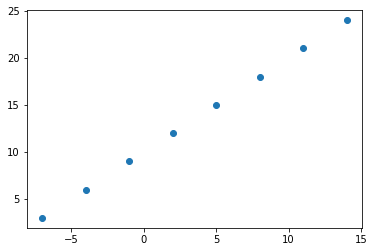

In [ ]:
#Select data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

#Create labels
Y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

#visualize
plt.scatter(X,Y)


In [ ]:
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [ ]:
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and Output shapes

In [ ]:
X.shape, Y.shape

((8,), (8,))

In [ ]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0].ndim

0

In [ ]:
X[0], Y[0]

(-7.0, 3.0)

In [ ]:
#Turn NumPy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)

X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

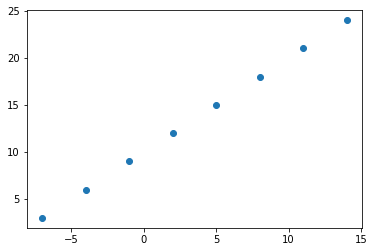

In [ ]:
plt.scatter(X,Y)

## Steps in modelling with TensorFlow

1.Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizers(tells our model to improve the patterns it is learning), and evaluation metrics( what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & Y ( features and labels).

In [ ]:
#Create a model (specified to your problem)
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

#Compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #or just use the string for stochastic gradient descent
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),Y, epochs=5)


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 32ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 10.9748 - mae: 10.9748


REMEMBER .CAST TO CHANGE DTYPE

In [ ]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 246ms/step


array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

Improve the model

we can improve our mode, by altering the steps we took to create a model.

**Creating a model** - here we might add more layers, increase the number of hidden units(all called neuros)
within each of the hidden layers, change the activation function of each layer.
**Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
**Fitting a model** - Here we can add number of times that the model looks through the date(number of epochs)

In [ ]:
#Final Model

model = tf.keras.Sequential([
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), #or just use the string for stochastic gradient descent
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),Y, epochs=100)



/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.3099 - mae: 14.3099
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 14.2781 - mae: 14.2781
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 14.2469 - mae: 14.2469
Epoch 4/100
1/1 [==============================] - 0s 39ms/step - loss: 14.2158 - mae: 14.2158
Epoch 5/100
1/1 [==============================] - 0s 55ms/step - loss: 14.1840 - mae: 14.1840
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 14.1522 - mae: 14.1522
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 14.1204 - mae: 14.1204
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 14.0885 - mae: 14.0885
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 14.0568 - mae: 14.0568
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 14.0250 - mae: 14.0250
Epoch 11/100
1/1 [==============================] -

In [ ]:
#Create a model (specified to your problem)
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

#Compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #or just use the string for stochastic gradient descent
              metrics=["mae"])

#Fit
model.fit(tf.expand_dims(X,axis=-1),Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 577ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6

In [ ]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.])

1/1 [==============================] - 0s 362ms/step


array([[30.158512]], dtype=float32)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 10.5494 - mae: 10.5494
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 9.7152 - mae: 9.7152
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 9.0090 - mae: 9.0090
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 8.2746 - mae: 8.2746
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 7.5151 - mae: 7.5151
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 5.8980 - mae: 5.8980
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 5.0336 - mae: 5.0336
Epoch 11/100
1/1 [==============================] - 0s 14ms/step 

In [ ]:
model.predict([17.])

1/1 [==============================] - 0s 193ms/step


array([[26.206875]], dtype=float32)

❗REMEMBER OVERFITTING. Try to generalize the data so the ML model can perform well on samples it has never seen before
 ATTENTION with activators(like ReLU)
optimizers(sgd, Adam,...) as well as their learning rates

build -> fit -> evaluate

In [ ]:
#Evaluate the model

model.evaluate(X,Y)

1/1 [==============================] - 0s 322ms/step - loss: 0.4215 - mae: 0.4215


[0.42148202657699585, 0.42148202657699585]

In [ ]:
X = tf.range(-100,100, 4)

X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y = X+10

Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

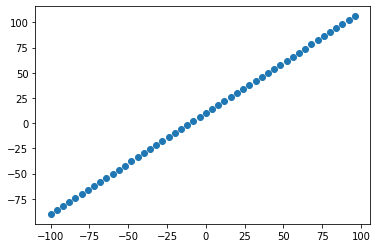

In [ ]:
plt.scatter(X,Y)

*Training set - the model learns from this data, which is typically 70-80% of the total data you have available
*Validation set - the model gets tuned on this data, this set is typically 10-15% of the tottal data available.
*Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the tottal data available.

In [ ]:
#Check the lenght of how man y samples we have
len(X)

50

In [ ]:
#Split the data into train and test sets
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

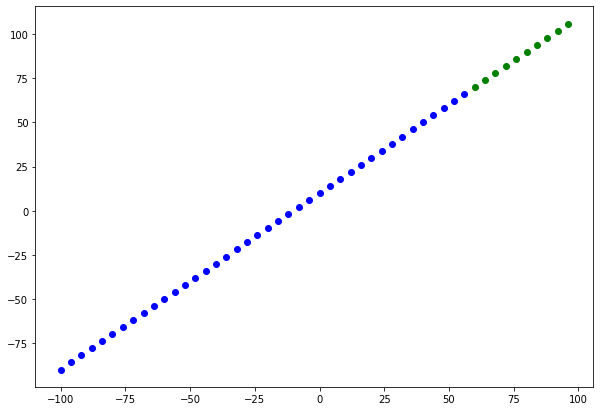

In [ ]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Test data")

In [ ]:
#Let's have a look at how to create a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 50.2151 - mae: 50.2151
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 46.7280 - mae: 46.7280
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 43.0384 - mae: 43.0384
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 39.5314 - mae: 39.5314
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 36.0511 - mae: 36.0511
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 32.8175 - mae: 32.8175
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 29.7634 - mae: 29.7634
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 26.6108 - mae: 26.6108
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 23.2421 - mae: 23.2421
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 20.4705 - mae: 20.4705
Epoch 11/100
2/2 [==============================] - 0s

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Visualize the number of inputs to set the input_shape parameter

X[0], Y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
#Create a model which builds automatically by defining the input_shape argument 
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,input_shape=[1],name="output_layer")
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=100, verbose=0)

model.fit(tf.expand_dims(X_test,axis=-1),Y_test, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Total x Trainable parameters: the total amount and the patterns the model can update as it trains, respectively

In [ ]:
model.predict([17.])

1/1 [==============================] - 0s 97ms/step


array([[26.707825]], dtype=float32)

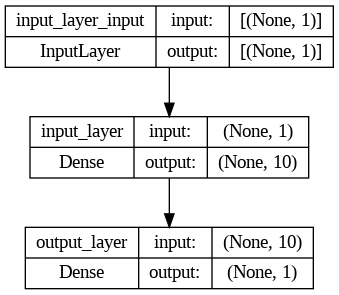

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
#Make predictions

Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 82ms/step


array([[ 70.10289 ],
       [ 74.13965 ],
       [ 78.17639 ],
       [ 82.21314 ],
       [ 86.249886],
       [ 90.286644],
       [ 94.323395],
       [ 98.360146],
       [102.3969  ],
       [106.433655]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.size(X_test) == tf.size(Y_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

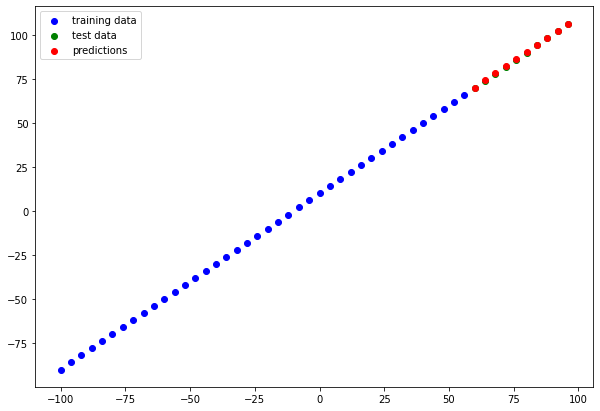

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train, c="b", label="training data")
plt.scatter(X_test, Y_test, c="g", label="test data")
plt.scatter(X_test, Y_pred, c="r", label="predictions")
plt.legend();

mean square error, r squared

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 191ms/step - loss: 0.2683 - mae: 0.2683


[0.2682693600654602, 0.2682693600654602]

In [ ]:
#Calculate the mean absolute error

mae = tf.metrics.mean_squared_error(y_true=Y_test,y_pred=tf.squeeze(Y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.08311115>

In [ ]:
#Make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

In [ ]:
#Make some functions to reuse MAE and MSE
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

In [ ]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mse"])

model_1.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=100,)
model_1.fit(tf.expand_dims(X_test,axis=-1),Y_test, epochs=100, )

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 391.2079 - mse: 391.2079
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 356.2643 - mse: 356.2643
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 323.2913 - mse: 323.2913
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 292.3669 - mse: 292.3669
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 264.7791 - mse: 264.7791
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 239.3957 - mse: 239.3957
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 215.2390 - mse: 215.2390
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 192.7495 - mse: 192.7495
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 174.0572 - mse: 174.0572
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 157.3491 - mse: 157.3491
Epoch 11/100
2/2 [=====================

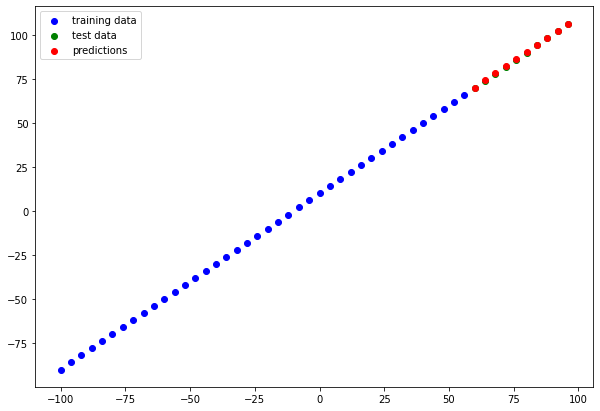

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train, c="b", label="training data")
plt.scatter(X_test, Y_test, c="g", label="test data")
plt.scatter(X_test, Y_pred, c="r", label="predictions")
plt.legend();

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["mse"]
                )

model_2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)
model_2.fit(tf.expand_dims(X_test,axis=-1),Y_test,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 17.1341 - mse: 391.2141
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 16.3267 - mse: 356.4623
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 15.5698 - mse: 323.4396
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 14.8027 - mse: 292.3486
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 14.0456 - mse: 264.6821
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 13.3200 - mse: 239.1184
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 12.5875 - mse: 214.3405
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8444 - mse: 190.9379
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1684 - mse: 171.2933
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5400 - mse: 153.6187
Epoch 11/100
2/2 [=====================

In [ ]:
tf.size(X_train), tf.size(Y_train), tf.size(X_test), tf.size(Y_test), tf.size(Y_pred)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, Y_pred.shape

(TensorShape([40]),
 TensorShape([40]),
 TensorShape([10]),
 TensorShape([10]),
 (10, 1))

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_pred
                     ):
  return 
  plt.figure(figsize=(10,7))
  plt.scatter(X_train,Y_train, c="b", label="training data")
  plt.scatter(X_test, Y_test, c="g", label="test data")
  plt.scatter(X_test, tf.squeeze(Y_pred), c="r", label="predictions")
  plt.legend();


In [ ]:
y_preds_2 = model_2.predict(X_test)



1/1 [==============================] - 0s 46ms/step


In [ ]:
mae_2 = mae(Y_test, y_preds_2)
mse_2 = mse(Y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.96936876>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.2692983>)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["mse"])
model_3.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 24.7643 - mse: 823.9166
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 19.0262 - mse: 488.4918
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 13.5870 - mse: 248.8546
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 8.8757 - mse: 111.0562
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 8.6327 - mse: 81.9647
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 10.8266 - mse: 120.0499
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.7706 - mse: 153.4776
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8001 - mse: 156.4655
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1962 - mse: 133.4668
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 10.0506 - mse: 101.6358
Epoch 11/500
2/2 [==============================] -

In [ ]:
y_preds_3 = model_3.predict(X_test)


1/1 [==============================] - 0s 57ms/step


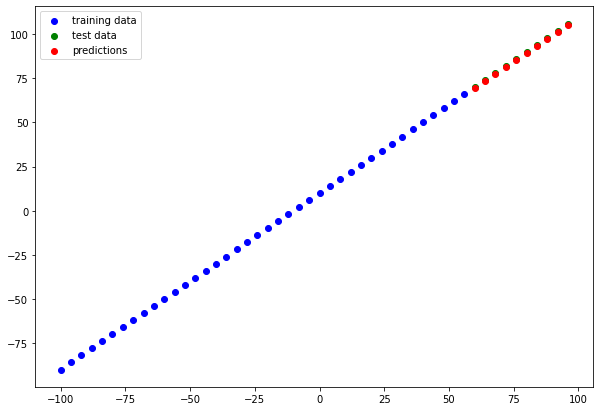

In [ ]:
  plt.figure(figsize=(10,7))
  plt.scatter(X_train,Y_train, c="b", label="training data")
  plt.scatter(X_test, Y_test, c="g", label="test data")
  plt.scatter(X_test, tf.squeeze(y_preds_3), c="r", label="predictions")
  plt.legend();

In [ ]:
mae_3 = mae(Y_test, y_preds_3)
mse_3 = mse(Y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.59697497>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.36349744>)

Comparing the results of experiments

🔑 You want to start with small experiments, and increase the complexity as much as possible before it starts overfitting

In [ ]:
import pandas as pd

model_results = [["model_1", mae_2.numpy(), mse_2.numpy()], ["model_2", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns= ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,0.969369,1.269298
1,model_2,0.596975,0.363497


In [ ]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In my case, the model_3 was the best, because as optimizer I used Adam at 0.01 instead of SGD

## Tracking your experiments

One good habit in ML modelling is to tracj the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource** As you bnuild more models, you'll want to look into using:

TensorBoard: TensorFlow visualization toolkit
Weights & Biases: Tracking tool for all kind of ML experiments



##Saving Models

Saving our models allows us to use them outside of google Colab, sucha s in web applications or mobile apps.

1. the SavedModel format
2. the HDF5 format

In [ ]:
model_2.save("bestmodel")

In [ ]:
model_2.save("bestmodelhdf5.h5")

In [ ]:
loaded_SavedModel_format = tf.keras.models.load_model("/content/bestmodel")
loaded_SavedModel_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
load_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == load_SavedModel_format_preds

1/1 [==============================] - 0s 19ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
load_HTF5Model_format = tf.keras.models.load_model("/content/bestmodelhdf5.h5")
load_HTF5Model_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
load_HTF5Model_format_preds = load_HTF5Model_format.predict(X_test)

1/1 [==============================] - 0s 156ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
model_2_preds == load_HTF5Model_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

**Download a model from Google Colab**

In [ ]:
from google.colab import files

files.download("/content/bestmodelhdf5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/bestmodelhdf5.h5 #and following the drive path

In [ ]:
!ls #drive path

A larger Example

In [ ]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#Import required libraries

In [ ]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#check the schema, and transform the non-numerical data into input features
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#in this case, we're gonna use one-hot encode via pandas

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Create X & Y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
#View X and Y

X.head(),y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 


#Create training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
X_train

In [ ]:
#Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

❗Pandas is built in NumPy, the Pandas Df is nothing more than an NP array

In [ ]:
#Check the results of the insurance model on the test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [ ]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

**Improve the model**

In [ ]:
#1st Experiment ( ad an extra layer with more hidden units)
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics="mae")

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

Text(0.5, 0, 'epochs')

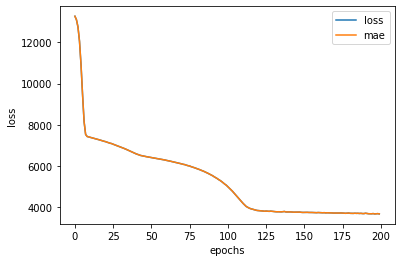

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

❓How long should you trian for?

It depends on the problem you're working on. However, many people have asked this question before, so TensorFlow has a solution! It's called the [EarlyStoppingCallback], which is a TensorFLow component you cana dd to your model to stop training once it stops improving in a certain metric.

#Preprocessing data (normalization and standardization)

if not sure on which to use, you could try both and see which performs better

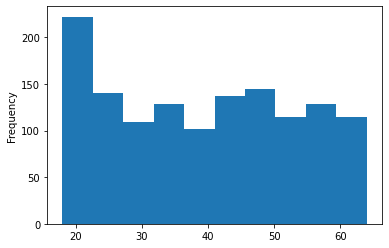

In [ ]:
X["age"].plot(kind="hist")

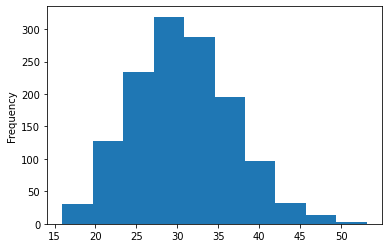

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
 insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from sklearn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi","children"]), 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization(MinMAxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[-1]

array([0.80434783, 0.37503363, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
tf.random.set_seed(42)

new_insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

new_insurance_model.compile(loss=tf.keras.losses.mae,
                            optimizer=tf.keras.optimizers.Adam(),
                                                metrics=["mae"])
new_insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

In [ ]:
new_insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]